# Classification Models

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.datasets import load_iris
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV


In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [3]:
df.columns.values

array(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words',
       ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
       ' num_imgs', ' num_videos', ' average_token_length',
       ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min',
       ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
       ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg',
       ' self_reference_min_shares', ' self_reference_max_shares',
       ' self_reference_avg_sharess', ' weekday_is_monday',
       ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday',
       ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend',
       ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04',
       ' global_subjectivity',

Looking at the columns above, it is noticed that most of the features' names begin with a space. Due to the inconvenince, we will fix the features' names by removing these spaces.

In [4]:
df.columns = df.columns.str.lstrip()
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed',
       'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min',
       'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max',
       'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday',
       'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive

Looking at the attributes, we can deduce that the attributes url and timedelta are irrelevant features for our scope so they will be dropped. And it was approved by the domain experts who developed the dataset that these attributes are irrelevant.

In [5]:
df.isnull().sum()

url                             0
timedelta                       0
n_tokens_title                  0
n_tokens_content                0
n_unique_tokens                 0
                               ..
title_subjectivity              0
title_sentiment_polarity        0
abs_title_subjectivity          0
abs_title_sentiment_polarity    0
shares                          0
Length: 61, dtype: int64

In [6]:
df.dtypes

url                              object
timedelta                       float64
n_tokens_title                  float64
n_tokens_content                float64
n_unique_tokens                 float64
                                 ...   
title_subjectivity              float64
title_sentiment_polarity        float64
abs_title_subjectivity          float64
abs_title_sentiment_polarity    float64
shares                            int64
Length: 61, dtype: object

In [7]:
df.drop(columns=['url', 'timedelta'], inplace = True)

In [8]:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

The rest of the data seem to be relevant so nothing needs to be dropped for now. With feature selection, the important features will be highlighted, and it will be applied later after the data cleaning. 

## Checking Datatypes of the columns

In [9]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [10]:
#data_channel_is_lifestyle        float64
#data_channel_is_entertainment    float64
#data_channel_is_bus              float64
#data_channel_is_socmed           float64
#data_channel_is_tech             float64
#data_channel_is_world            float64
#weekday_is_monday                float64
#weekday_is_tuesday               float64
#weekday_is_wednesday             float64
#weekday_is_thursday              float64
#weekday_is_friday                float64
#weekday_is_saturday              float64
#weekday_is_sunday                float64
#is_weekend                       float64
temp = df.drop(['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend'],axis = 1)

In [11]:
temp

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

The datatypes of the columns are all adjusted to the appropriate datatypes so there is no cleaning needed in this part. 

## Checking for Duplicate Values

In [12]:
df.duplicated().sum()

0

The dataset has no duplicates to be dropped.

## Checking for Outliers

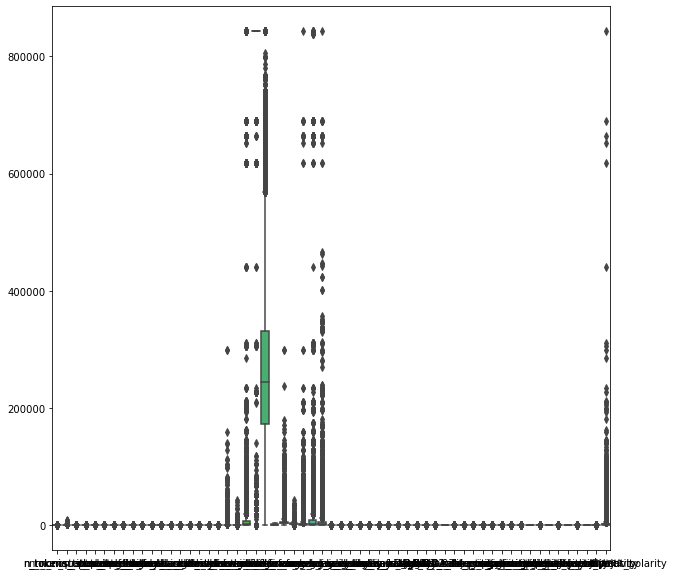

In [13]:
fig = plt.figure(figsize =(10, 10))
sns.boxplot(data = df)
plt.show()

In [14]:
for col in df:
    series = df[col]
    print(col, ': ','max: ', series.max(),", min: ", series.min())

n_tokens_title :  max:  23.0 , min:  2.0
n_tokens_content :  max:  8474.0 , min:  0.0
n_unique_tokens :  max:  701.0 , min:  0.0
n_non_stop_words :  max:  1042.0 , min:  0.0
n_non_stop_unique_tokens :  max:  650.0 , min:  0.0
num_hrefs :  max:  304.0 , min:  0.0
num_self_hrefs :  max:  116.0 , min:  0.0
num_imgs :  max:  128.0 , min:  0.0
num_videos :  max:  91.0 , min:  0.0
average_token_length :  max:  8.04153354633 , min:  0.0
num_keywords :  max:  10.0 , min:  1.0
data_channel_is_lifestyle :  max:  1.0 , min:  0.0
data_channel_is_entertainment :  max:  1.0 , min:  0.0
data_channel_is_bus :  max:  1.0 , min:  0.0
data_channel_is_socmed :  max:  1.0 , min:  0.0
data_channel_is_tech :  max:  1.0 , min:  0.0
data_channel_is_world :  max:  1.0 , min:  0.0
kw_min_min :  max:  377.0 , min:  -1.0
kw_max_min :  max:  298400.0 , min:  0.0
kw_avg_min :  max:  42827.8571429 , min:  -1.0
kw_min_max :  max:  843300.0 , min:  0.0
kw_max_max :  max:  843300.0 , min:  0.0
kw_avg_max :  max:  843300

<AxesSubplot:>

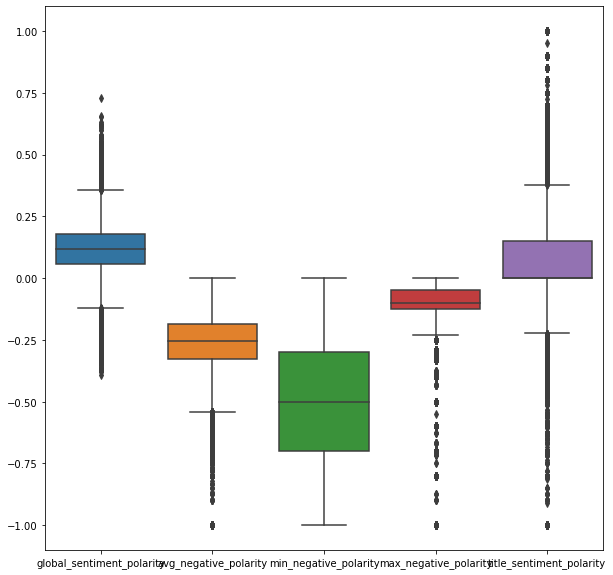

In [15]:
range0=[]
range1=[]
range2=[]
range3=[]
range4=[]

for col in df:
    if df[col].min() >= 0 and df[col].max() <= 1:
        range0.append(col)
plotdf = df.drop(columns=range0)
for col in plotdf:
    if df[col].min() >= 0 and df[col].max() <= 100:
        range1.append(col)
    elif df[col].min() >= 0 and df[col].max() <= 500:
        range2.append(col)
    elif df[col].min() >= 0 and df[col].max() <= 1000:
        range3.append(col)
    elif df[col].min() >= -1 and df[col].max() <= 1:
        range4.append(col)
fig = plt.figure(figsize =(10, 10))
sns.boxplot(data = df[range4])


## Using Quantile Method to Trim outliers

In [16]:
Q1 = temp.quantile(0.25)
Q3 = temp.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

n_tokens_title                  3.000000e+00
n_tokens_content                4.700000e+02
n_unique_tokens                 1.378252e-01
n_non_stop_words                4.314000e-09
n_non_stop_unique_tokens        1.288902e-01
num_hrefs                       1.000000e+01
num_self_hrefs                  3.000000e+00
num_imgs                        3.000000e+00
num_videos                      1.000000e+00
average_token_length            3.764347e-01
num_keywords                    3.000000e+00
kw_min_min                      5.000000e+00
kw_max_min                      5.550000e+02
kw_avg_min                      2.152500e+02
kw_min_max                      7.900000e+03
kw_max_max                      0.000000e+00
kw_avg_max                      1.581331e+05
kw_min_avg                      2.056781e+03
kw_max_avg                      2.457852e+03
kw_avg_avg                      1.217781e+03
self_reference_min_shares       1.961000e+03
self_reference_max_shares       6.900000e+03
self_refer

Calculating upper fence and lower fence

In [17]:
upper_fence = Q3 + (1.5 * IQR)
lower_fence = Q1 - (1.5 * IQR)
print(upper_fence, lower_fence)

n_tokens_title                      16.500000
n_tokens_content                  1421.000000
n_unique_tokens                      0.815433
n_non_stop_words                     1.000000
n_non_stop_unique_tokens             0.947965
num_hrefs                           29.000000
num_self_hrefs                       8.500000
num_imgs                             8.500000
num_videos                           2.500000
average_token_length                 5.419491
num_keywords                        13.500000
kw_min_min                          11.500000
kw_max_min                        1832.500000
kw_avg_min                         679.875000
kw_min_max                       19750.000000
kw_max_max                      843300.000000
kw_avg_max                      568179.687500
kw_min_avg                        5141.952579
kw_max_avg                        9706.732474
kw_avg_avg                        5426.901062
self_reference_min_shares         5541.500000
self_reference_max_shares        1

In [18]:
#for col in temp:
#    temp_df = temp[((temp[col] > upper_fence[col]) | (temp[col] < lower_fence[col]))]
#    new_df = temp[~((temp[col] > upper_fence[col]) | (temp[col] < lower_fence[col]))]
#print(temp.shape, new_df.shape)

In [19]:
temp_df = temp[((temp > upper_fence) | (temp < lower_fence)).any(axis=1)]
df_out = temp[~((temp > upper_fence) |(temp < lower_fence)).any(axis=1)]
df_out.shape, temp_df.shape

((4312, 45), (35332, 45))

In [20]:
df_out

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
9402              8.0             166.0         0.644172               1.0   
9405              7.0             245.0         0.616667               1.0   
9418             11.0             195.0         0.637838               1.0   
9419             12.0             245.0         0.632911               1.0   
9420             11.0             175.0         0.666667               1.0   
...               ...               ...              ...               ...   
39608            11.0             575.0         0.530466               1.0   
39614             9.0             904.0         0.472158               1.0   
39622            11.0            1122.0         0.439421               1.0   
39624            12.0             429.0         0.514925               1.0   
39630            12.0             491.0         0.454167               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
9402                   0.838384        5.0             1.0       0.0   
9405                   0.762821        8.0             5.0       1.0   
9418                   0.785124        6.0             4.0       1.0   
9419                   0.771242        8.0             5.0       0.0   
9420                   0.818182        8.0             1.0       0.0   
...                         ...        ...             ...       ...   
39608                  0.681440        8.0             5.0       1.0   
39614                  0.606822       27.0             2.0       2.0   
39622                  0.635258        4.0             1.0       6.0   
39624                  0.658436        3.0             3.0       3.0   
39630                  0.609665        2.0             2.0       2.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
9402          0.0              4.993976  ...               0.100000   
9405          0.0              4.767347  ...               0.100000   
9418          0.0              4.256410  ...               0.136364   
9419          0.0              4.971429  ...               0.033333   
9420          0.0              4.845714  ...               0.033333   
...           ...                   ...  ...                    ...   
39608         0.0              4.582609  ...               0.033333   
39614         0.0              4.884956  ...               0.100000   
39622         0.0              4.866310  ...               0.100000   
39624         0.0              4.263403  ...               0.166667   
39630         1.0              4.054990  ...               0.062500   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
9402                    0.50               0.000000               0.000000   
9405                    0.50              -0.341667              -0.500000   
9418                    1.00               0.000000               0.000000   
9419                    0.60              -0.108631              -0.166667   
9420                    0.50               0.000000               0.000000   
...                      ...                    ...                    ...   
39608                   0.70              -0.343519              -1.000000   
39614                   0.60              -0.225694              -0.500000   
39622                   1.00              -0.262500              -1.000000   
39624                   0.75              -0.179847              -0.312500   
39630                   0.90              -0.164881              -0.333333   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
9402                0.000000            0.000000                  0.000000   
9405               -0.125000            0.000000                  0.000000   
9418                0.000000            0.625000                  0.175000   
9419               -0.071429            0.600000                  0.200000   
9420                0.000

In [21]:
temp_df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

In [22]:
new_df = df.drop(temp_df.index)
df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
0             0.0              4.680365  ...               0.100000   
1             0.0              4.913725  ...               0.033333   
2             0.0              4.393365  ...               0.100000   
3             0.0              4.404896  ...               0.136364   
4             0.0              4.682836  ...               0.033333   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.100000   
39640        48.0              4.405488  ...               0.136364   
39641         1.0              5.076923  ...               0.136364   
39642         0.0              4.975073  ...               0.062500   
39643         2.0              4.471338  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050

In [23]:
new_df

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
9402              8.0             166.0         0.644172               1.0   
9405              7.0             245.0         0.616667               1.0   
9418             11.0             195.0         0.637838               1.0   
9419             12.0             245.0         0.632911               1.0   
9420             11.0             175.0         0.666667               1.0   
...               ...               ...              ...               ...   
39608            11.0             575.0         0.530466               1.0   
39614             9.0             904.0         0.472158               1.0   
39622            11.0            1122.0         0.439421               1.0   
39624            12.0             429.0         0.514925               1.0   
39630            12.0             491.0         0.454167               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
9402                   0.838384        5.0             1.0       0.0   
9405                   0.762821        8.0             5.0       1.0   
9418                   0.785124        6.0             4.0       1.0   
9419                   0.771242        8.0             5.0       0.0   
9420                   0.818182        8.0             1.0       0.0   
...                         ...        ...             ...       ...   
39608                  0.681440        8.0             5.0       1.0   
39614                  0.606822       27.0             2.0       2.0   
39622                  0.635258        4.0             1.0       6.0   
39624                  0.658436        3.0             3.0       3.0   
39630                  0.609665        2.0             2.0       2.0   

       num_videos  average_token_length  ...  min_positive_polarity  \
9402          0.0              4.993976  ...               0.100000   
9405          0.0              4.767347  ...               0.100000   
9418          0.0              4.256410  ...               0.136364   
9419          0.0              4.971429  ...               0.033333   
9420          0.0              4.845714  ...               0.033333   
...           ...                   ...  ...                    ...   
39608         0.0              4.582609  ...               0.033333   
39614         0.0              4.884956  ...               0.100000   
39622         0.0              4.866310  ...               0.100000   
39624         0.0              4.263403  ...               0.166667   
39630         1.0              4.054990  ...               0.062500   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
9402                    0.50               0.000000               0.000000   
9405                    0.50              -0.341667              -0.500000   
9418                    1.00               0.000000               0.000000   
9419                    0.60              -0.108631              -0.166667   
9420                    0.50               0.000000               0.000000   
...                      ...                    ...                    ...   
39608                   0.70              -0.343519              -1.000000   
39614                   0.60              -0.225694              -0.500000   
39622                   1.00              -0.262500              -1.000000   
39624                   0.75              -0.179847              -0.312500   
39630                   0.90              -0.164881              -0.333333   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
9402                0.000000            0.000000                  0.000000   
9405               -0.125000            0.000000                  0.000000   
9418                0.000000            0.625000                  0.175000   
9419               -0.071429            0.600000                  0.200000   
9420                0.000

In [24]:
df_out = df_out.merge(new_df)

In [25]:
df_out

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                8.0             166.0         0.644172               1.0   
1                7.0             245.0         0.616667               1.0   
2               11.0             195.0         0.637838               1.0   
3               12.0             245.0         0.632911               1.0   
4               11.0             175.0         0.666667               1.0   
...              ...               ...              ...               ...   
4307            11.0             575.0         0.530466               1.0   
4308             9.0             904.0         0.472158               1.0   
4309            11.0            1122.0         0.439421               1.0   
4310            12.0             429.0         0.514925               1.0   
4311            12.0             491.0         0.454167               1.0   

      n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                     0.838384        5.0             1.0       0.0   
1                     0.762821        8.0             5.0       1.0   
2                     0.785124        6.0             4.0       1.0   
3                     0.771242        8.0             5.0       0.0   
4                     0.818182        8.0             1.0       0.0   
...                        ...        ...             ...       ...   
4307                  0.681440        8.0             5.0       1.0   
4308                  0.606822       27.0             2.0       2.0   
4309                  0.635258        4.0             1.0       6.0   
4310                  0.658436        3.0             3.0       3.0   
4311                  0.609665        2.0             2.0       2.0   

      num_videos  average_token_length  ...  data_channel_is_tech  \
0            0.0              4.993976  ...                   1.0   
1            0.0              4.767347  ...                   0.0   
2            0.0              4.256410  ...                   0.0   
3            0.0              4.971429  ...                   1.0   
4            0.0              4.845714  ...                   0.0   
...          ...                   ...  ...                   ...   
4307         0.0              4.582609  ...                   0.0   
4308         0.0              4.884956  ...                   0.0   
4309         0.0              4.866310  ...                   0.0   
4310         0.0              4.263403  ...                   1.0   
4311         1.0              4.054990  ...                   0.0   

      data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                       0.0                0.0                 0.0   
1                       0.0                0.0                 0.0   
2                       0.0                0.0                 0.0   
3                       0.0                0.0                 0.0   
4                       0.0                0.0                 0.0   
...                     ...                ...                 ...   
4307                    0.0                0.0                 1.0   
4308                    1.0                0.0                 1.0   
4309                    1.0                0.0                 1.0   
4310                    0.0                0.0                 1.0   
4311                    1.0                0.0                 1.0   

      weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                      0.0                  1.0                0.0   
1                      0.0                  1.0                0.0   
2                      0.0                  1.0                0.0   
3                      0.0                  1.0                0.0   
4                      0.0                  1.0                0.0   
...                    ...                  ...                ...   
4307                   0.0                  0.0                0.0  

## Discretizing the Target

It is noticed that the target we want to reach which is predicting the number of shares needs to be converted into a a multi class classification problem. This can be atchieved by taking the y_train data and distribute them into bins which will act the classes that will be classified to.

In [26]:
###############outliered#############
X_out = df_out.iloc[:,0:-1]
y_out = pd.DataFrame(data=df_out['shares'])
y_out

shares
0       2600
1       1000
2        774
3       1600
4       1700
...      ...
4307    1300
4308    1400
4309    2900
4310    3200
4311    1500

[4312 rows x 1 columns]

In [27]:
X = df.iloc[:,0:-1]
y = pd.DataFrame(data=df['shares'])
y

shares
0         593
1         711
2        1500
3        1200
4         505
...       ...
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300

[39644 rows x 1 columns]

In [28]:
X

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
0                12.0             219.0         0.663594               1.0   
1                 9.0             255.0         0.604743               1.0   
2                 9.0             211.0         0.575130               1.0   
3                 9.0             531.0         0.503788               1.0   
4                13.0            1072.0         0.415646               1.0   
...               ...               ...              ...               ...   
39639            11.0             346.0         0.529052               1.0   
39640            12.0             328.0         0.696296               1.0   
39641            10.0             442.0         0.516355               1.0   
39642             6.0             682.0         0.539493               1.0   
39643            10.0             157.0         0.701987               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
0                      0.815385        4.0             2.0       1.0   
1                      0.791946        3.0             1.0       1.0   
2                      0.663866        3.0             1.0       1.0   
3                      0.665635        9.0             0.0       1.0   
4                      0.540890       19.0            19.0      20.0   
...                         ...        ...             ...       ...   
39639                  0.684783        9.0             7.0       1.0   
39640                  0.885057        9.0             7.0       3.0   
39641                  0.644128       24.0             1.0      12.0   
39642                  0.692661       10.0             1.0       1.0   
39643                  0.846154        1.0             1.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
0             0.0              4.680365  ...               0.378636   
1             0.0              4.913725  ...               0.286915   
2             0.0              4.393365  ...               0.495833   
3             0.0              4.404896  ...               0.385965   
4             0.0              4.682836  ...               0.411127   
...           ...                   ...  ...                    ...   
39639         1.0              4.523121  ...               0.333791   
39640        48.0              4.405488  ...               0.374825   
39641         1.0              5.076923  ...               0.307273   
39642         0.0              4.975073  ...               0.236851   
39643         2.0              4.471338  ...               0.247338   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
0                   0.100000                   0.70              -0.350000   
1                   0.033333                   0.70              -0.118750   
2                   0.100000                   1.00              -0.466667   
3                   0.136364                   0.80              -0.369697   
4                   0.033333                   1.00              -0.220192   
...                      ...                    ...                    ...   
39639               0.100000                   0.75              -0.260000   
39640               0.136364                   0.70              -0.211111   
39641               0.136364                   0.50              -0.356439   
39642               0.062500                   0.50              -0.205246   
39643               0.100000                   0.50              -0.200000   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
0                     -0.600              -0.200000            0.500000   
1                     -0.125              -0.100000            0.000000   
2                     -0.800              -0.133333            0.000000   
3                     -0.600              -0.166667            0.000000   
4                     -0.500            

In [29]:
cut = pd.DataFrame(pd.cut(y_out['shares'], 5)).value_counts().rename_axis('bins').reset_index(name = 'counts')
cut

bins  counts
0  (16.522, 1117.6]    1972
1  (1117.6, 2213.2]    1593
2  (2213.2, 3308.8]     444
3  (3308.8, 4404.4]     205
4  (4404.4, 5500.0]      98

<AxesSubplot:xlabel='bins'>

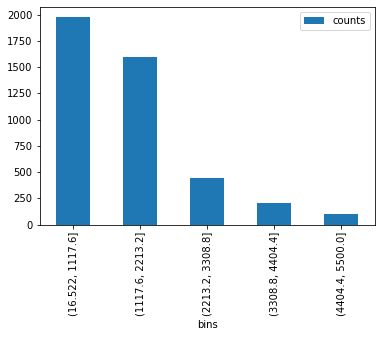

In [30]:
cut.plot.bar(x = 'bins', y = 'counts')

array([array([  22. , 1117.6, 2213.2, 3308.8, 4404.4, 5500. ])],
      dtype=object)

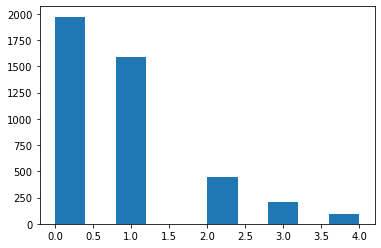

In [33]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_trans_uniform = kbins.fit_transform(y_out)
plt.hist(data_trans_uniform, bins=10)
data_trans_uniform
kbins.bin_edges_

array([array([  22.        , 1153.19794763, 1918.62480603, 2919.36524582,
              4141.03189007, 5500.        ])                             ],
      dtype=object)

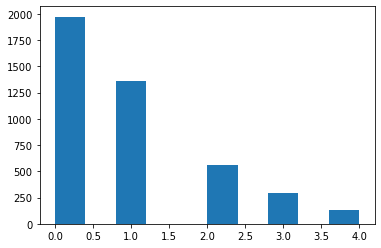

In [34]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
data_trans_kmeans = kbins.fit_transform(y_out)
plt.hist(data_trans_kmeans, bins=10)
data_trans_kmeans
kbins.bin_edges_

array([array([  22. ,  821.2, 1100. , 1400. , 2100. , 5500. ])],
      dtype=object)

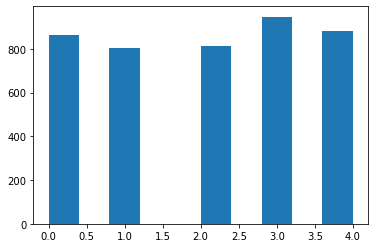

In [35]:
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data_trans_quantile = kbins.fit_transform(y_out)
plt.hist(data_trans_quantile, bins=10)
kbins.bin_edges_

In [36]:
y_cut = pd.DataFrame(cut, columns=['Class'])
y

shares
0         593
1         711
2        1500
3        1200
4         505
...       ...
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300

[39644 rows x 1 columns]

In [37]:
edges = np.int64(kbins.bin_edges_[0])
edges

array([  22,  821, 1100, 1400, 2100, 5500], dtype=int64)

In [42]:
y_uniform = pd.DataFrame(data_trans_uniform, columns=['Class'])
y_uniform

Class
0       2.0
1       0.0
2       0.0
3       1.0
4       1.0
...     ...
4307    1.0
4308    1.0
4309    2.0
4310    2.0
4311    1.0

[4312 rows x 1 columns]

In [43]:
y_quantile = pd.DataFrame(data_trans_quantile, columns=['Class'])
y_quantile

Class
0       4.0
1       1.0
2       0.0
3       3.0
4       3.0
...     ...
4307    2.0
4308    3.0
4309    4.0
4310    4.0
4311    3.0

[4312 rows x 1 columns]

In [44]:
y_kmeans = pd.DataFrame(data_trans_kmeans, columns=['Class'])
y_kmeans

Class
0       2.0
1       0.0
2       0.0
3       1.0
4       1.0
...     ...
4307    1.0
4308    1.0
4309    2.0
4310    3.0
4311    1.0

[4312 rows x 1 columns]

## Splitting the Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_out, y_uniform, test_size=0.3, random_state=42)

<AxesSubplot:>

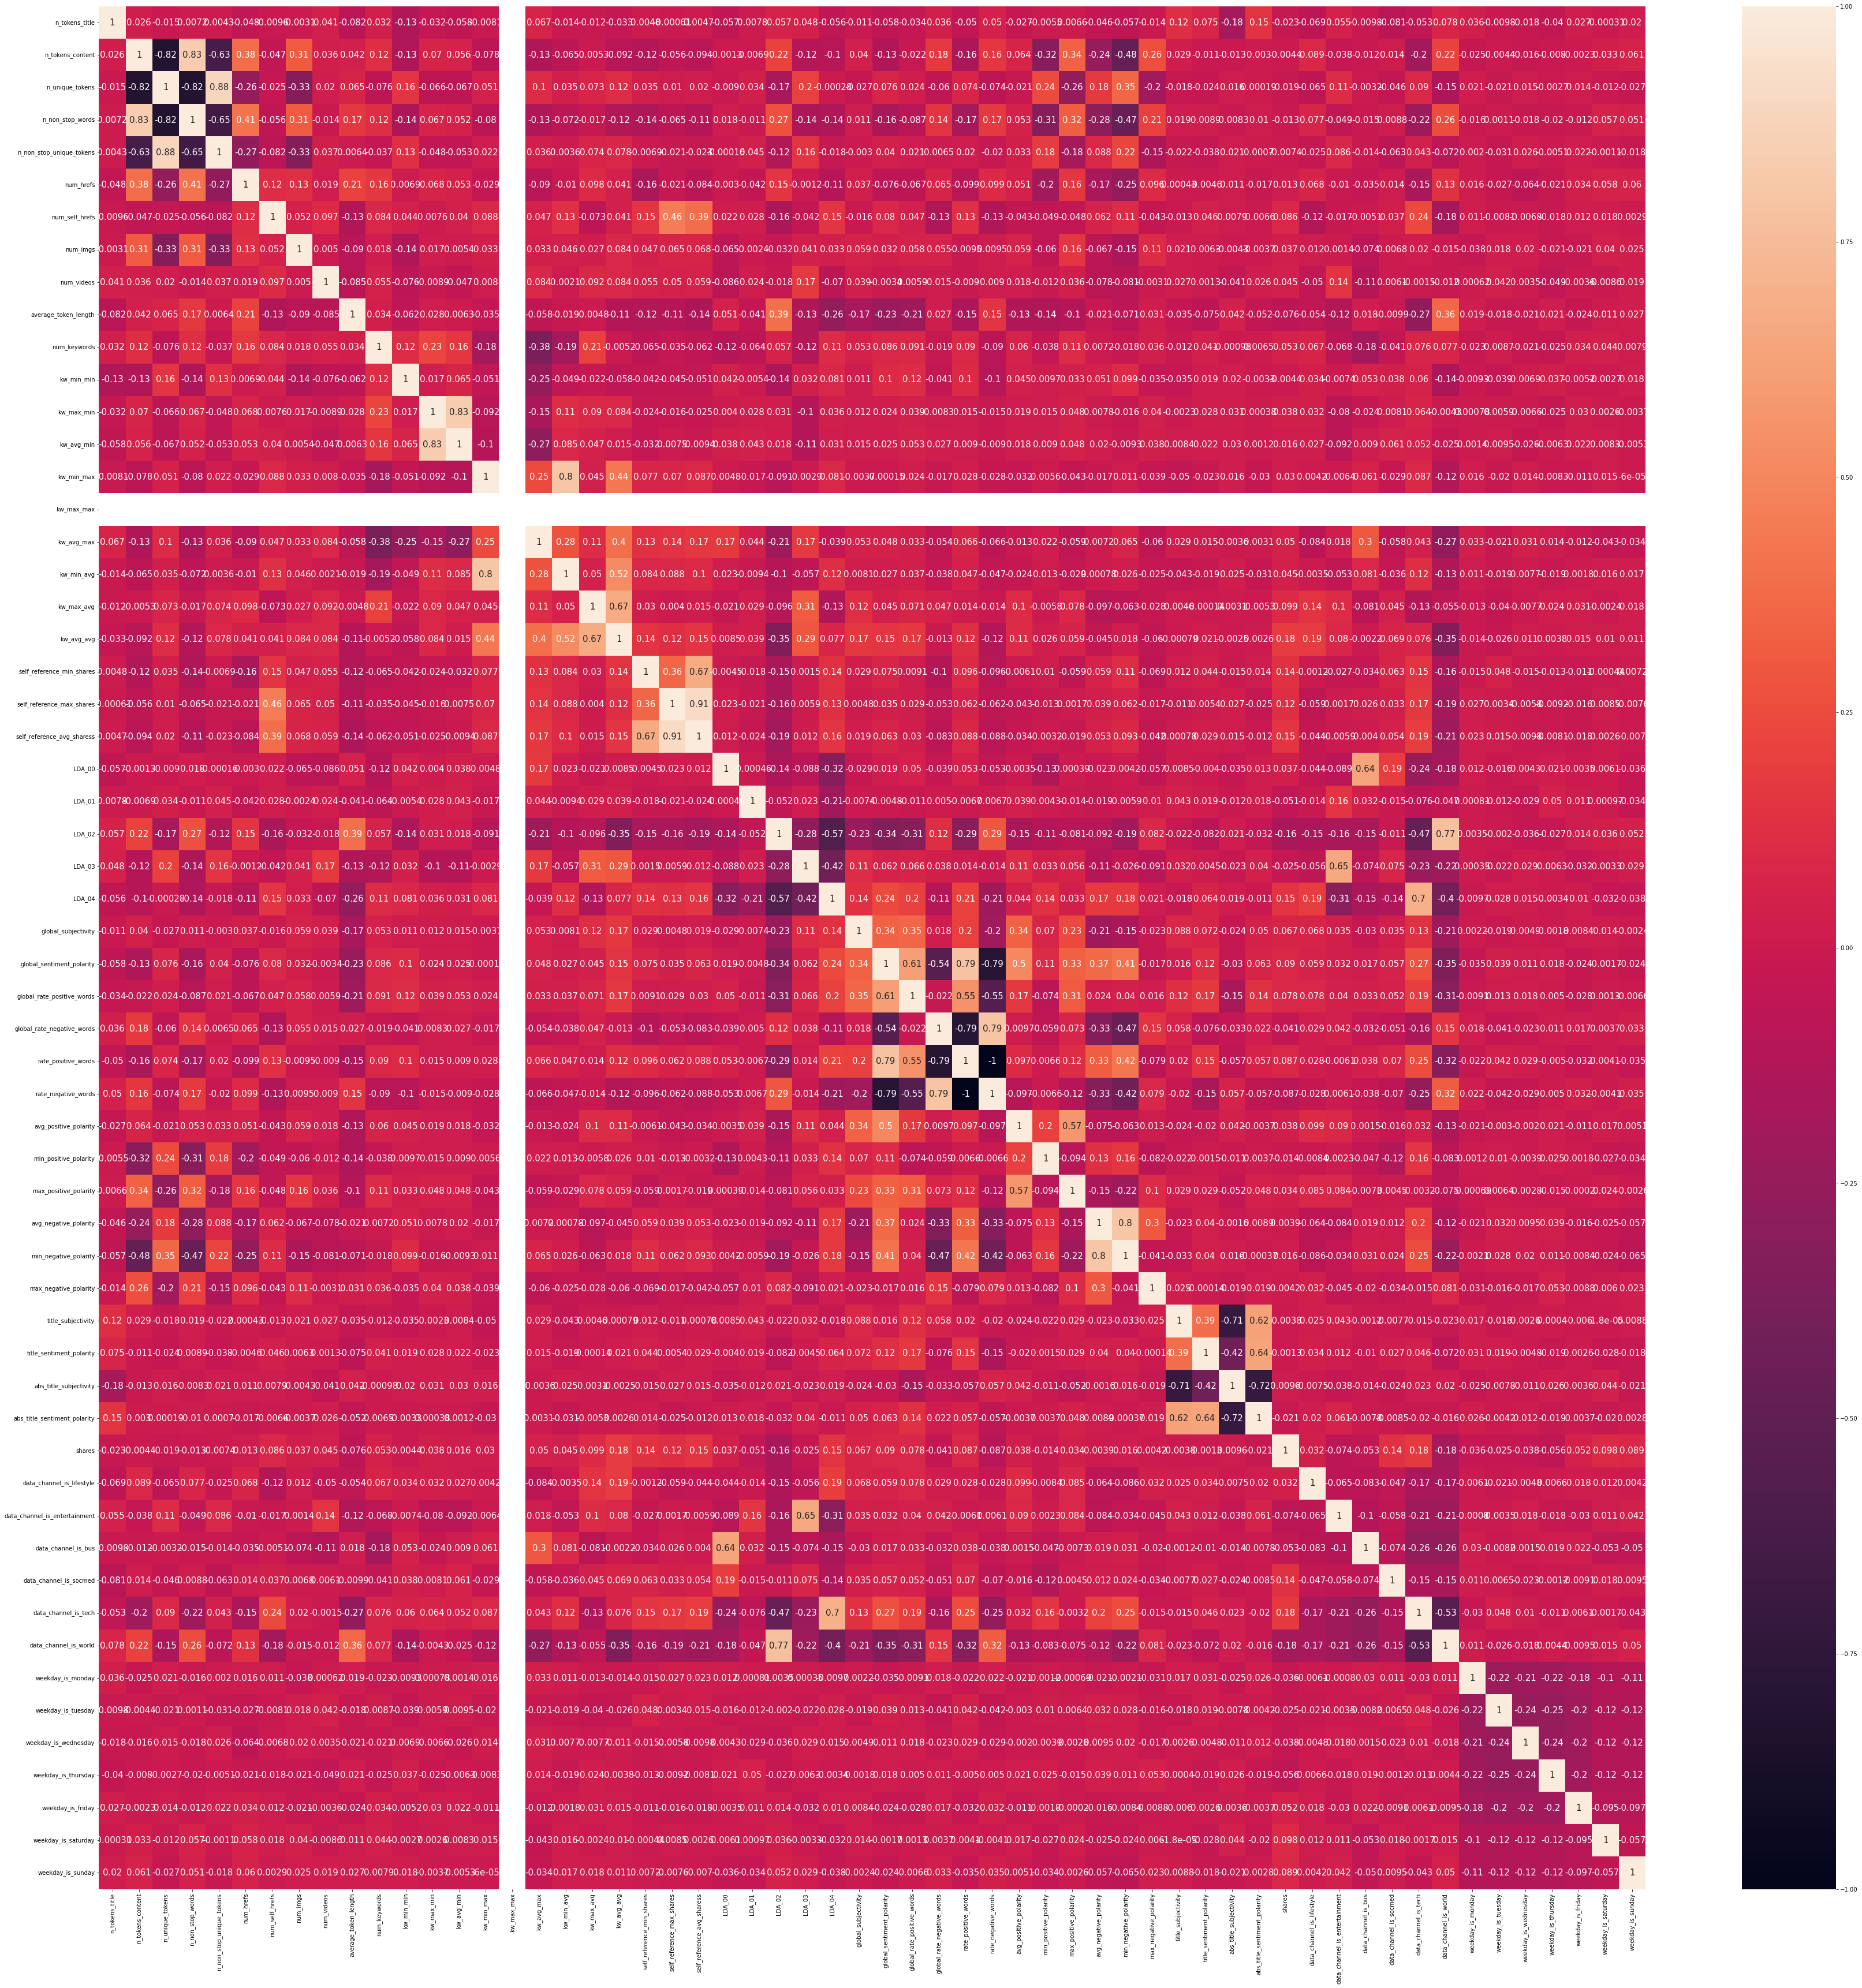

In [46]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(60,60)
sns.heatmap(corrmat, annot=True,annot_kws={'size': 15})


<AxesSubplot:>

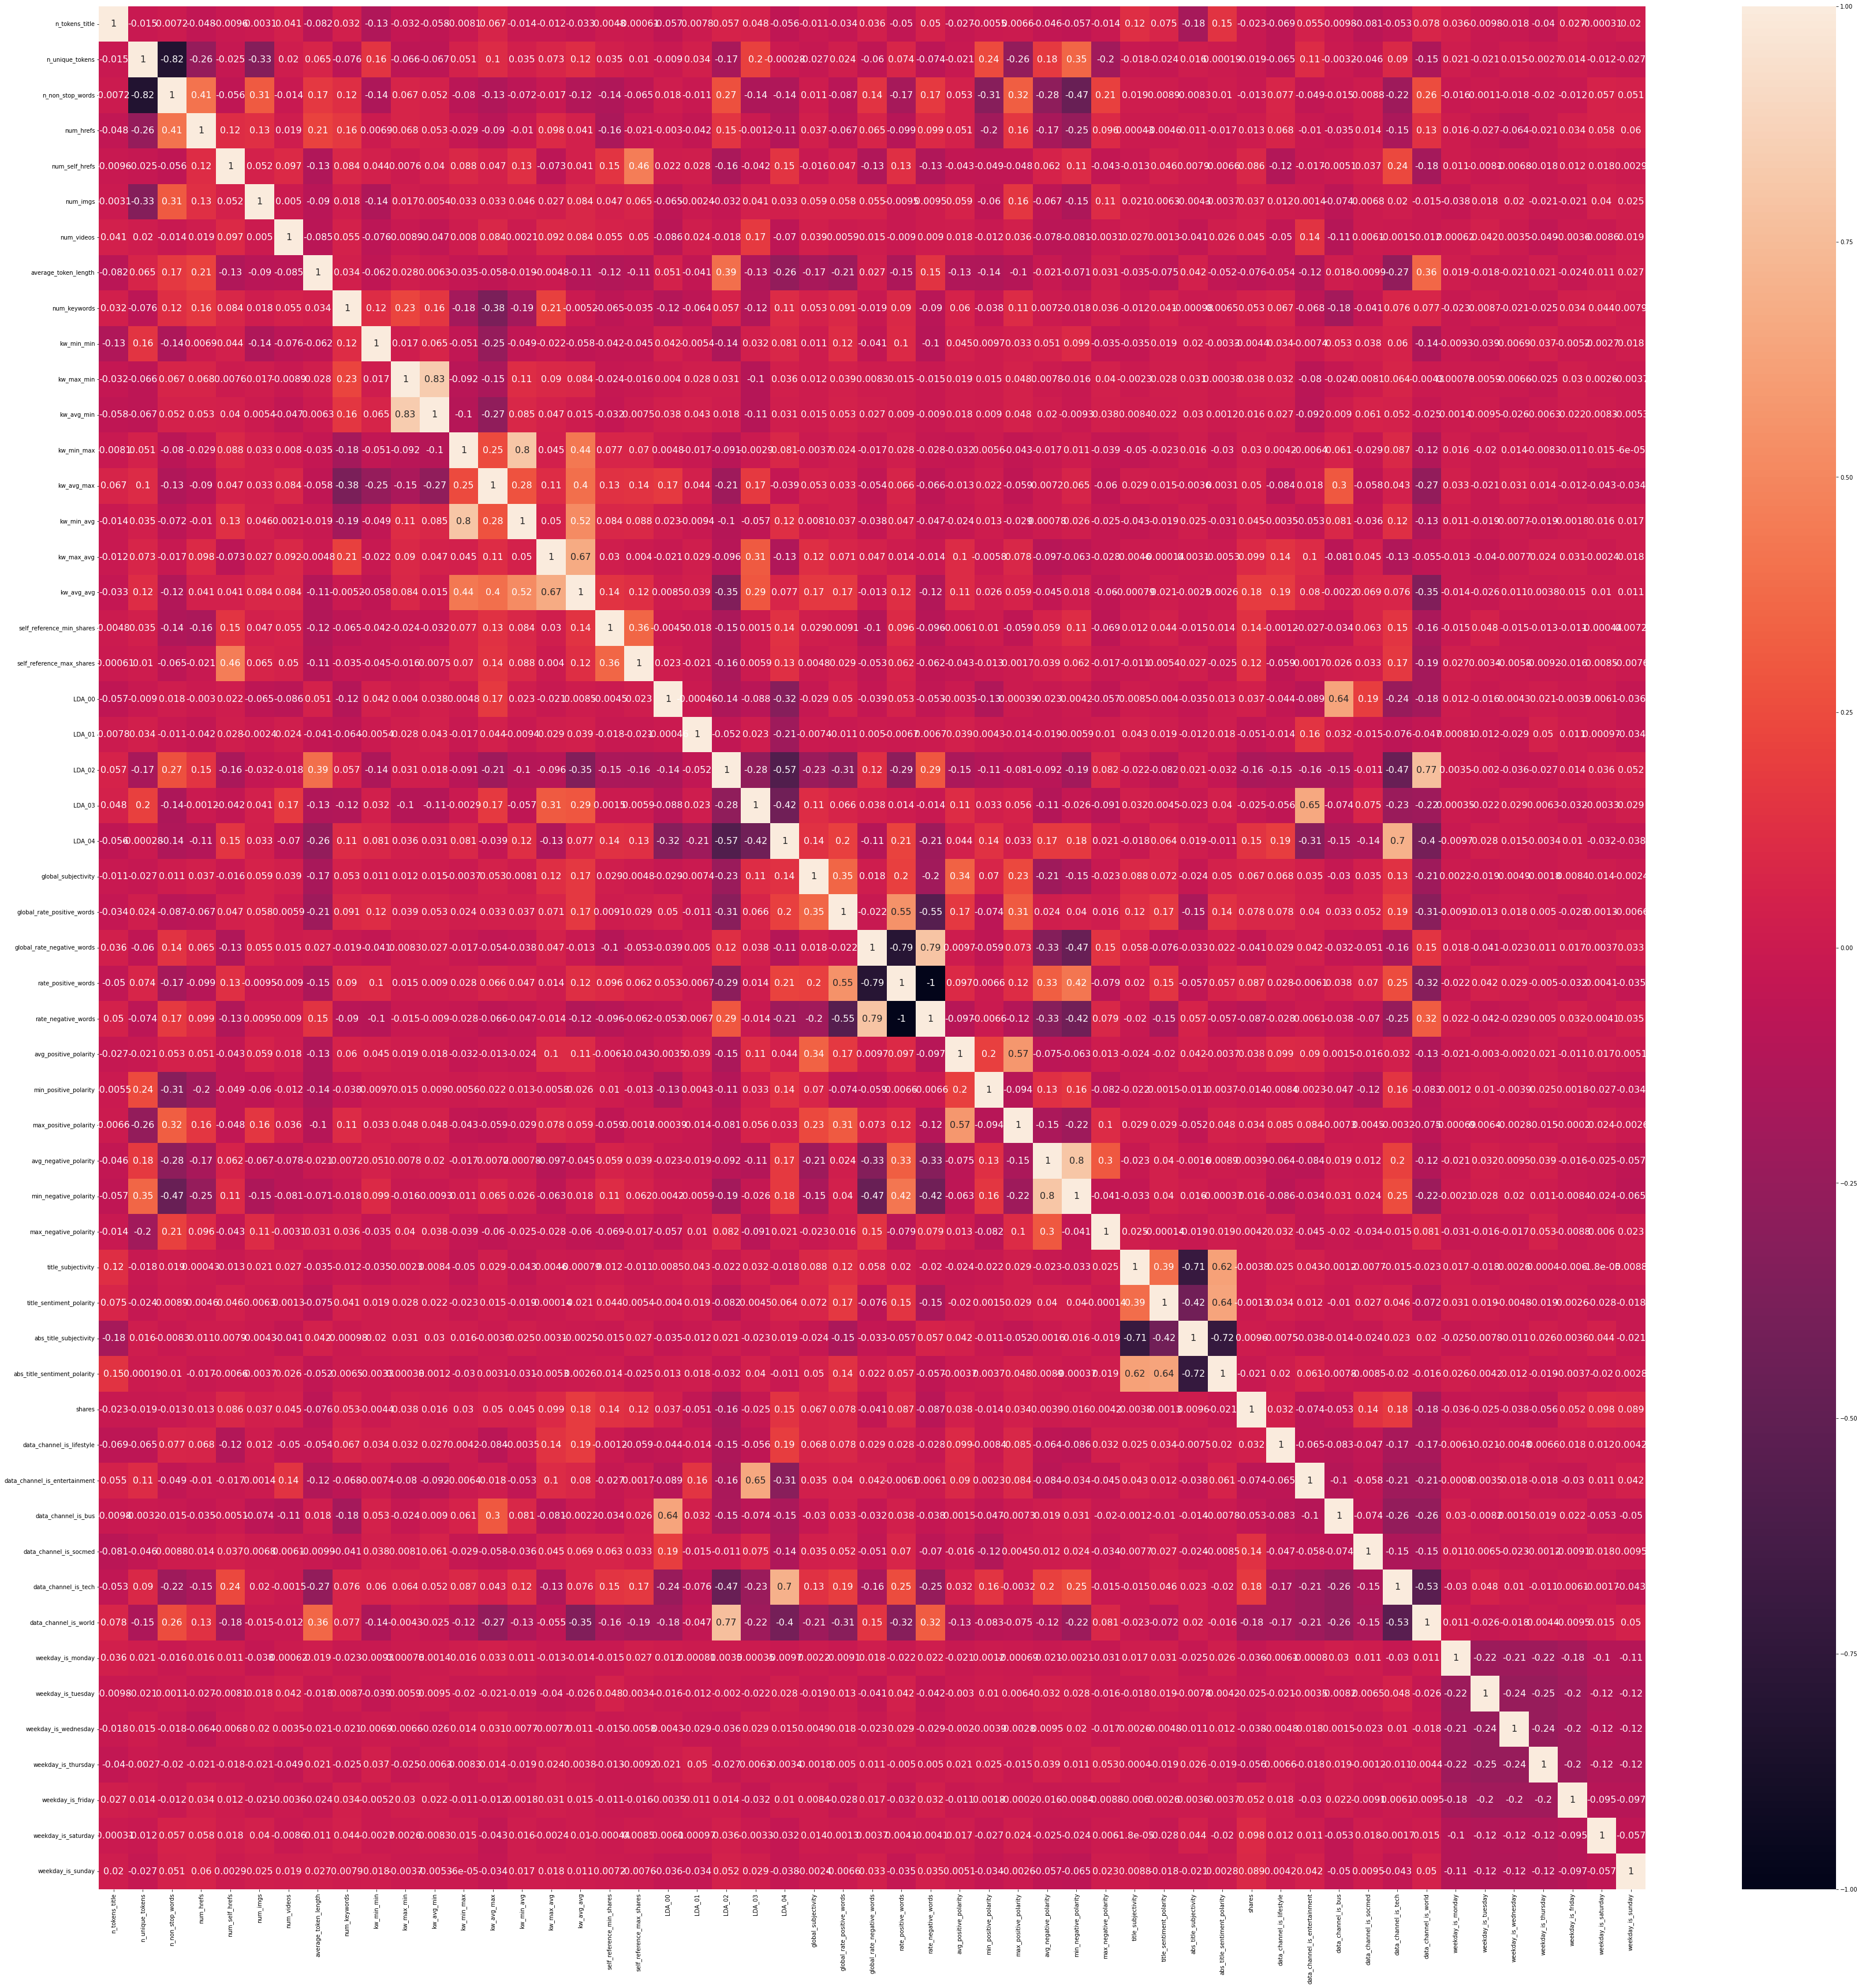

In [47]:
X_train.drop(columns=[ 'n_tokens_content', 'n_non_stop_unique_tokens','global_sentiment_polarity','self_reference_avg_sharess','kw_max_max'], inplace = True)
X_test.drop(columns=[ 'n_tokens_content', 'n_non_stop_unique_tokens','global_sentiment_polarity','self_reference_avg_sharess','kw_max_max'], inplace = True)

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(60,60)
sns.heatmap(corrmat, annot=True,annot_kws={'size': 16})

In [33]:
X_train

n_tokens_title  n_tokens_content  n_unique_tokens  n_non_stop_words  \
24783            10.0            1434.0         0.441245               1.0   
4133              8.0             109.0         0.779817               1.0   
24458             7.0            1691.0         0.317829               1.0   
33796             9.0             324.0         0.607029               1.0   
14365            10.0             176.0         0.686047               1.0   
...               ...               ...              ...               ...   
10393             9.0             875.0         0.519253               1.0   
7249             16.0             104.0         0.735294               1.0   
24746             7.0             276.0         0.622711               1.0   
30232            10.0             374.0         0.570652               1.0   
2332              9.0             349.0         0.595238               1.0   

       n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  num_imgs  \
24783                  0.438866      145.0             2.0       7.0   
4133                   0.882353        6.0             5.0       0.0   
24458                  0.531737        6.0             2.0       2.0   
33796                  0.783069        6.0             1.0       1.0   
14365                  0.784483        5.0             3.0       1.0   
...                         ...        ...             ...       ...   
10393                  0.730097       32.0            31.0       1.0   
7249                   0.910714        5.0             4.0       0.0   
24746                  0.810976        9.0             4.0       1.0   
30232                  0.712446        7.0             5.0       2.0   
2332                   0.694064        4.0             3.0       0.0   

       num_videos  average_token_length  ...  avg_positive_polarity  \
24783         0.0              5.451185  ...               0.275895   
4133          1.0              4.926606  ...               0.716667   
24458         1.0              4.099349  ...               0.303287   
33796         0.0              4.808642  ...               0.434694   
14365         0.0              5.028409  ...               0.255682   
...           ...                   ...  ...                    ...   
10393         0.0              4.630857  ...               0.372972   
7249          0.0              4.432692  ...               0.443333   
24746         0.0              4.858696  ...               0.368333   
30232         0.0              4.877005  ...               0.333405   
2332         11.0              4.226361  ...               0.504040   

       min_positive_polarity  max_positive_polarity  avg_negative_polarity  \
24783               0.100000                    1.0              -0.181061   
4133                0.500000                    1.0              -0.500000   
24458               0.050000                    1.0              -0.242246   
33796               0.100000                    1.0              -0.416667   
14365               0.136364                    0.5              -0.585185   
...                      ...                    ...                    ...   
10393               0.033333                    1.0              -0.222049   
7249                0.166667                    0.8              -0.400000   
24746               0.160000                    0.6              -0.143333   
30232               0.136364                    0.5              -0.154365   
2332                0.100000                    1.0              -0.242857   

       min_negative_polarity  max_negative_polarity  title_subjectivity  \
24783                   -0.4              -0.050000            0.700000   
4133                    -0.5              -0.500000            0.600000   
24458                   -0.5              -0.050000            0.000000   
33796                   -1.0              -0.166667            1.000000   
14365                   -0.8            

## Training The Classification Models

### Model (1): Decision Trees

#### Training without Feature selection

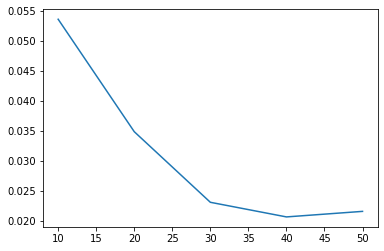

In [67]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
max_depth = [10,20,30,40,50]
scores=[]
for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train1, y_train1)
    y_pred1 = tree.predict(X_test1)
    scores.append(metrics.accuracy_score(y_test1, y_pred1))
plt.plot(max_depth, scores)

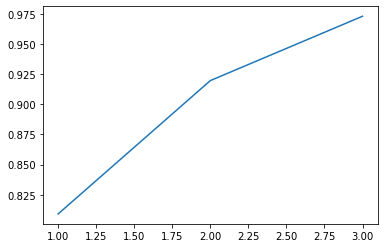

In [97]:
max_depth = [1,2,3]
scores=[]
for depth in max_depth:
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.plot(max_depth, scores)

In [94]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.979
Accuracy on test set: 0.973


c:\Users\Farah\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


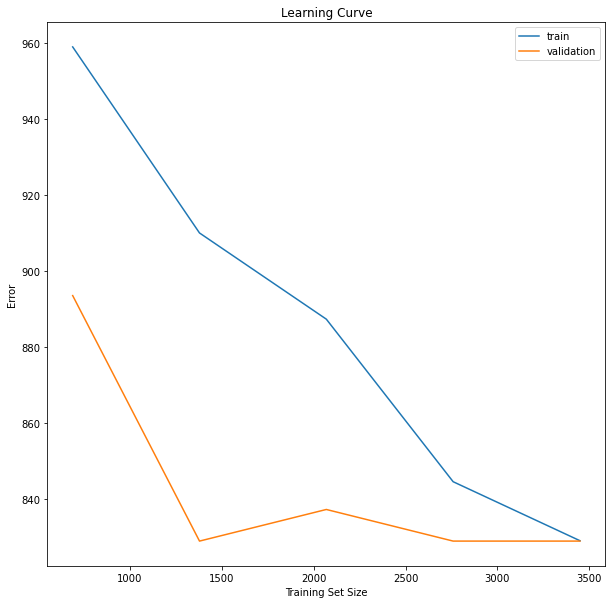

In [71]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree,
    X=X_out,
    y=y_out,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes =[0.2,0.4,0.6,0.8,1],
   
)

train_mean = -train_scores.mean(axis=1)
train_std = -train_scores.std(axis=1)

test_mean = -test_scores.mean(axis=1)
test_std = -test_scores.std (axis=1)

plt.subplots(figsize=(10,10))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")


plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Error")
plt.legend(loc="best")

plt.show()

c:\Users\Farah\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


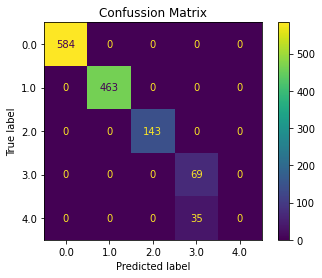

In [98]:
plot_confusion_matrix(tree, X_test, y_test)  
plt.title('Confussion Matrix')
plt.show()

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       584
         1.0       1.00      1.00      1.00       463
         2.0       1.00      1.00      1.00       143
         3.0       0.66      1.00      0.80        69
         4.0       0.00      0.00      0.00        35

    accuracy                           0.97      1294
   macro avg       0.73      0.80      0.76      1294
weighted avg       0.96      0.97      0.96      1294



c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Farah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training with Feature selection

In [100]:
sfs = SFS(DecisionTreeClassifier(max_depth=30, random_state=0),
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  53 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.3s finished

[2022-11-11 12:54:59] Features: 1/7 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 out of  52 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.2s finished

[2022-11-11 12:54:59] Features: 2/7 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  51 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.2s finished

[2022-11-11 12:55:00] Features: 3/7 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished

[2022-11-11 12:55:

feature_idx avg_score
1                   (39,)       1.0
2                 (0, 39)       1.0
3              (0, 1, 39)       1.0
4           (0, 1, 2, 39)       1.0
5        (0, 1, 2, 3, 39)       1.0
6     (0, 1, 2, 3, 4, 39)       1.0
7  (0, 1, 2, 3, 4, 5, 39)       1.0

In [101]:
sfs = SFS(DecisionTreeClassifier(max_depth=30, random_state=0),
         k_features = (1, 7),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    0.8s finished

[2022-11-11 12:55:18] Features: 52/1 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    0.8s finished

[2022-11-11 12:55:19] Features: 51/1 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    0.9s finished

[2022-11-11 12:55:20] Features: 50/1 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished

[2022-11-11 12:55:21] Features: 49/1 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.9s finished

[2022-11-11 12:55:22] Features: 48/1 -- score: 1.0[Parallel(

feature_idx avg_score
53  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
52  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
51  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
50  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
48  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
47  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
46  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
45  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
44  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
43  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
42  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
41  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
40  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
39  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
38  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
37  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
36  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
26  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
25  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
23  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
21  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
20  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
19  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...       1.0
14     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 39)       1.0
13         (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 39)       1.0
12             (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 39)       1.0
11                 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 39)       1.0
10                    (0, 1, 2, 3, 4, 5, 6, 7, 8, 39)       1.0
9                        (0, 1, 2, 3, 4, 5, 6, 7, 39)       1.0
8                           (0, 1, 2, 3, 4, 5, 6, 39)       1.0
7                              (0, 1, 2, 3, 4, 5, 39)       1.0
6                                 (0, 1, 2, 3, 4, 39)       1.0
5                                    (0, 1, 2, 3, 39)       1.0
4                                       (0, 1, 2, 39)       1.0
3                                          (0, 1, 39)       1.0
2                                             (0, 39)       1.0
1                                               (39,)       1.0

### Model (2): KNN

#### Training without Feature selection

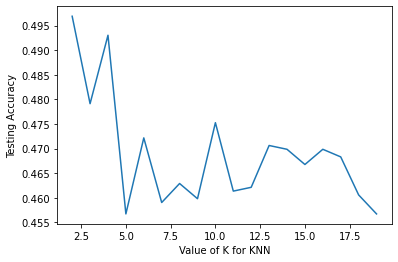

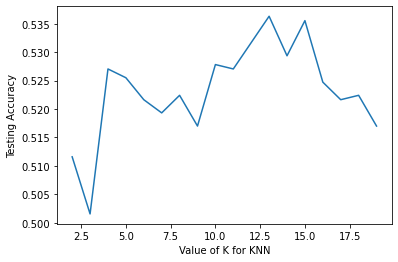

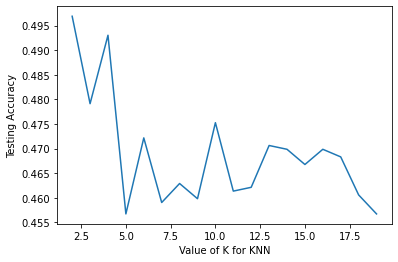

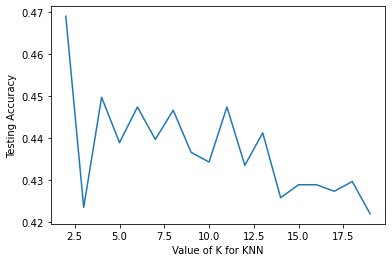

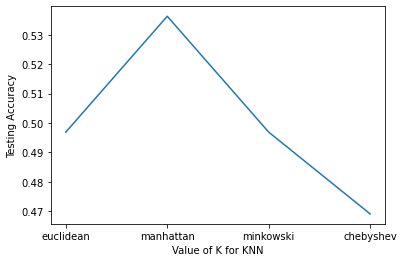

In [65]:
k_range = range(2, 20)
k_Metric = ['euclidean','manhattan','minkowski','chebyshev']
global_scores=[]
for kmetric in k_Metric:
    scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k,metric=kmetric)
        knn.fit(X_train, y_train.values.ravel())
        y_pred = knn.predict(X_test)
        scores.append(metrics.accuracy_score(y_test, y_pred))
    plt.plot(k_range, scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Testing Accuracy')
    plt.show()
    global_scores.append(max(scores))
plt.plot(k_Metric, global_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [68]:
knn = KNeighborsClassifier(n_neighbors=13,metric='manhattan')
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.626
Accuracy on test set: 0.536


#### Training with Feature selection

In [69]:
sfs = SFS(knn,
         k_features = (1, 7),
          forward= True,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train)

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:    8.7s finished

[2022-11-11 13:45:34] Features: 1/7 -- score: 0.9986737400530504[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:    2.3s finished

[2022-11-11 13:45:36] Features: 2/7 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:    2.5s finished

[2022-11-11 13:45:39] Features: 3/7 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    2.3s finished

feature_idx avg_score
1                   (39,)  0.998674
2                 (0, 39)       1.0
3              (0, 1, 39)       1.0
4           (0, 1, 2, 39)       1.0
5        (0, 1, 2, 3, 39)       1.0
6     (0, 1, 2, 3, 4, 39)       1.0
7  (0, 1, 2, 3, 4, 5, 39)       1.0

In [71]:
sfs = SFS(knn,
         k_features = (1, 7),
          forward= False,
          verbose= 2,
          scoring= 'accuracy',
          cv = 4,
          n_jobs= -1
         ).fit(X_train, y_train.values.ravel())

avg = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
avg = avg[["feature_idx","avg_score"]]
avg

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  53 out of  53 | elapsed:   15.3s finished

[2022-11-11 13:46:40] Features: 52/1 -- score: 0.7511602578741194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  52 out of  52 | elapsed:   10.2s finished

[2022-11-11 13:46:51] Features: 51/1 -- score: 0.8227361357528062[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  51 out of  51 | elapsed:   10.0s finished

[2022-11-11 13:47:01] Features: 50/1 -- score: 0.8797266674864299[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  50 out o

feature_idx avg_score
53  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   0.51027
52  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...   0.75116
51  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14,...  0.822736
50  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...  0.879727
49  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15,...  0.939034
48  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16,...  0.968191
47  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 19,...  0.988073
46  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 19, 20,...   0.99768
45  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
44  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
43  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
42  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
41  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
40  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
39  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
38  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
37  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
36  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
35  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
34  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
33  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
32  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
31  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
30  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
29  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
28  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
27  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
26  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
25  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
24  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
23  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
22  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
21  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
20  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
19  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
18  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
17  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
16  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
15  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 21,...       1.0
14     (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 20, 39)       1.0
13         (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 19, 39)       1.0
12             (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 39)       1.0
11                 (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 39)       1.0
10                    (0, 1, 2, 3, 4, 5, 6, 7, 8, 39)       1.0
9                        (0, 1, 2, 3, 4, 5, 6, 7, 39)       1.0
8                           (0, 1, 2, 3, 4, 5, 6, 39)       1.0
7                              (0, 1, 2, 3, 4, 5, 39)       1.0
6                                 (0, 1, 2, 3, 4, 39)       1.0
5                                    (0, 1, 2, 3, 39)       1.0
4                                       (0, 1, 2, 39)       1.0
3                                          (0, 1, 39)       1.0
2                                             (0, 39)       1.0
1                                               (39,)  0.998674

### Model (3): Logistic Regression

#### Training without Feature selection

#### Training with Feature selection